<a href="https://colab.research.google.com/github/swetharaomasadi/Data-Analysis/blob/main/Supermarket%20Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hosammhmdali/supermarket-sales")

print("Path to dataset files:", path)

100%|██████████| 35.9k/35.9k [00:00<00:00, 9.30MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hosammhmdali/supermarket-sales/versions/1


In [5]:
!kaggle datasets download hosammhmdali/supermarket-sales

Dataset URL: https://www.kaggle.com/datasets/hosammhmdali/supermarket-sales
License(s): MIT
  0% 0.00/35.9k [00:00<?, ?B/s]
100% 35.9k/35.9k [00:00<00:00, 4.87MB/s]


In [8]:
!unzip /content/supermarket-sales.zip

Archive:  /content/supermarket-sales.zip
  inflating: supermarket_sales -.csv  


In [15]:
import pandas as pd
data=pd.read_csv("/content/supermarket_sales -.csv")
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [12]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [17]:
data.fillna(0,inplace=True)

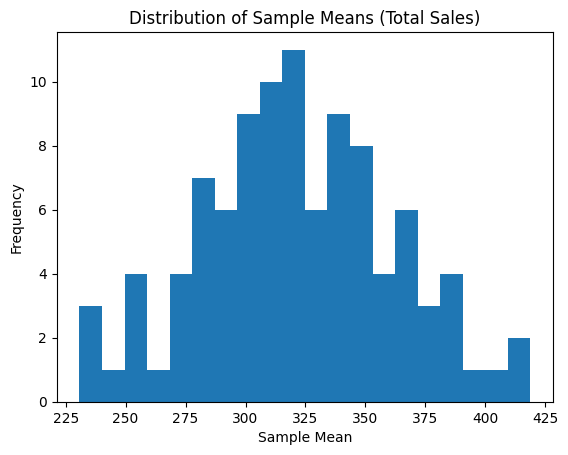

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame loaded from the CSV file

# Define sample size and number of samples
sample_size = 30  # Adjust as needed
num_samples = 100  # Adjust as needed

# Calculate sample means
sample_means = []
for i in range(num_samples):
    sample = data['Total'].sample(n=sample_size, replace=True) # Sampling from 'Total' column
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

# Create histogram
plt.hist(sample_means, bins=20)  # Adjust bins as needed
plt.title('Distribution of Sample Means (Total Sales)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

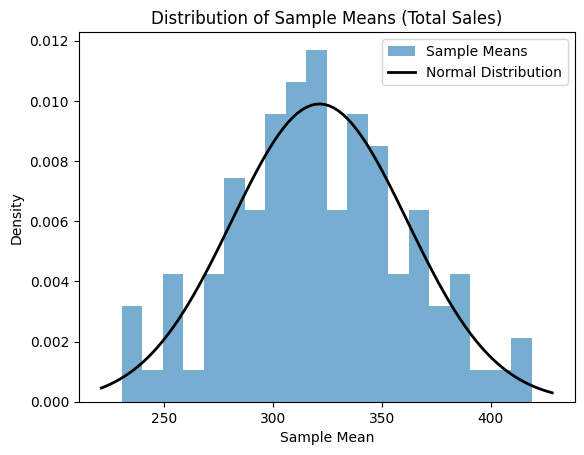

In [19]:
# Create histogram
plt.hist(sample_means, bins=20, density=True, alpha=0.6, label='Sample Means')

# Add normal distribution curve
xmin, xmax = plt.xlim() # Get x-axis limits for the normal curve
x = np.linspace(xmin, xmax, 100) # Generate x-values for the curve
p = stats.norm.pdf(x, np.mean(sample_means), np.std(sample_means)) # Calculate normal distribution values
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution') # Plot the curve

plt.title('Distribution of Sample Means (Total Sales)')
plt.xlabel('Sample Mean')
plt.ylabel('Density') # Changed to 'Density' since we're normalizing
plt.legend() # Add a legend
plt.show()

In [24]:
import pandas as pd

# Assuming 'data' is your DataFrame

non_numeric_cols = data.select_dtypes(exclude=['number']).columns.tolist()

print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']


In [25]:
data = pd.get_dummies(data, columns=non_numeric_cols)
data

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Invoice ID_101-17-6199,Invoice ID_101-81-4070,...,Time_20:50,Time_20:51,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,False,False,...,False,False,False,False,False,False,False,False,False,True
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,False,False,...,False,False,False,False,False,False,False,True,False,False
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,False,False,...,False,False,False,False,False,False,False,False,True,False
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,False,False,...,False,False,False,False,False,False,False,False,False,True
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2,False,False,...,False,False,False,False,False,False,False,False,False,True
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4,False,False,...,False,False,False,False,False,False,False,False,False,True
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7,False,False,...,False,False,False,False,False,False,False,True,False,False
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1,False,False,...,False,False,False,False,False,False,False,True,False,False


In [26]:
stats=data.describe().loc[['mean','std']]
print(stats)

      Unit price  Quantity     Tax 5%       Total       cogs  \
mean   55.672130  5.510000  15.379369  322.966749  307.58738   
std    26.494628  2.923431  11.708825  245.885335  234.17651   

      gross margin percentage  gross income   Rating  
mean             4.761905e+00     15.379369  6.97270  
std              6.131498e-14     11.708825  1.71858  


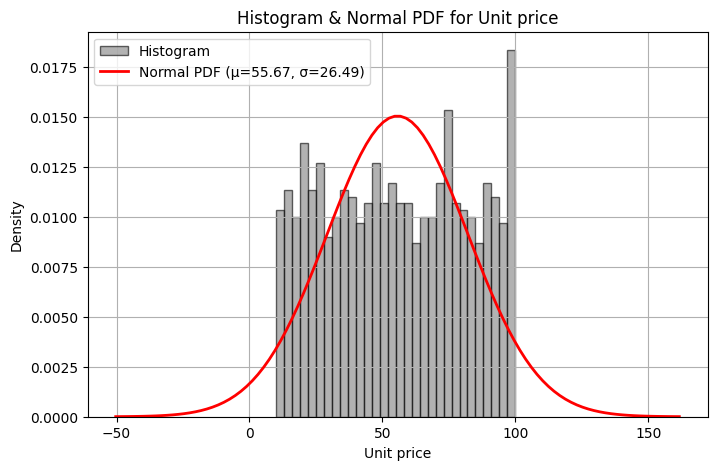

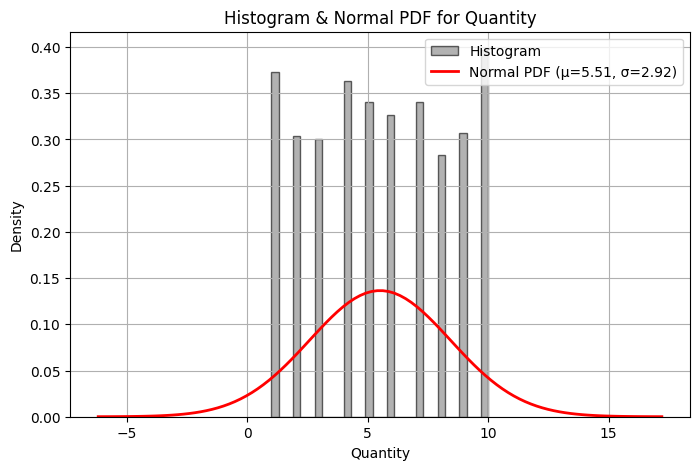

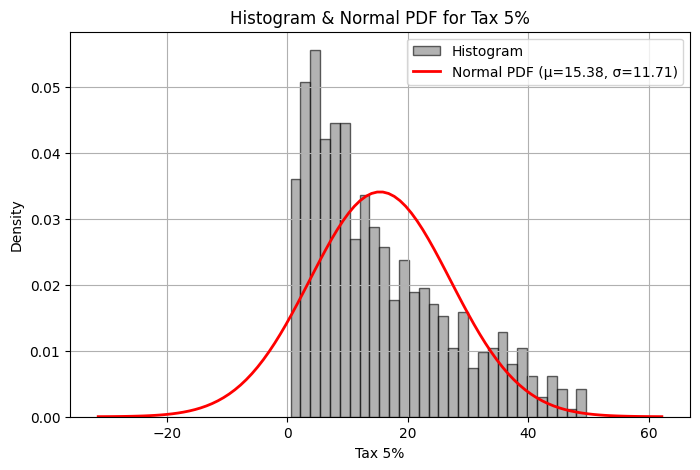

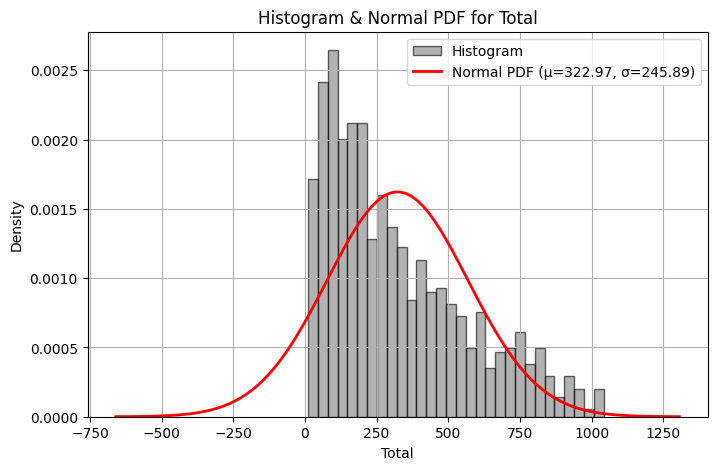

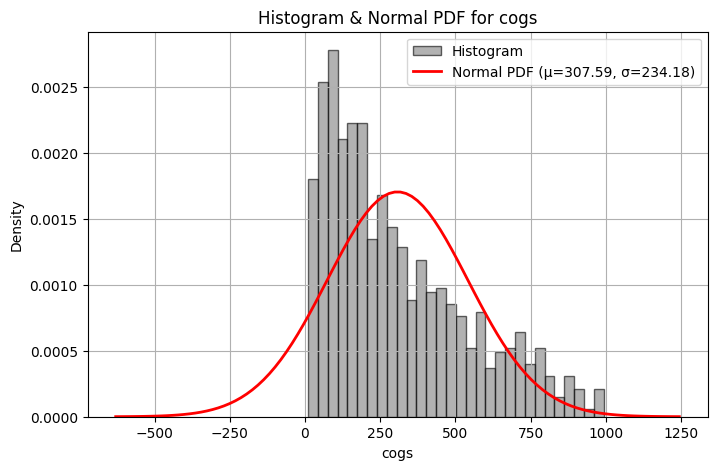

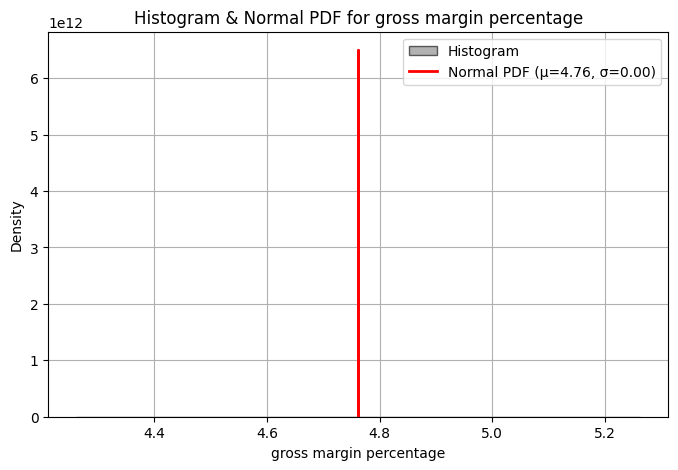

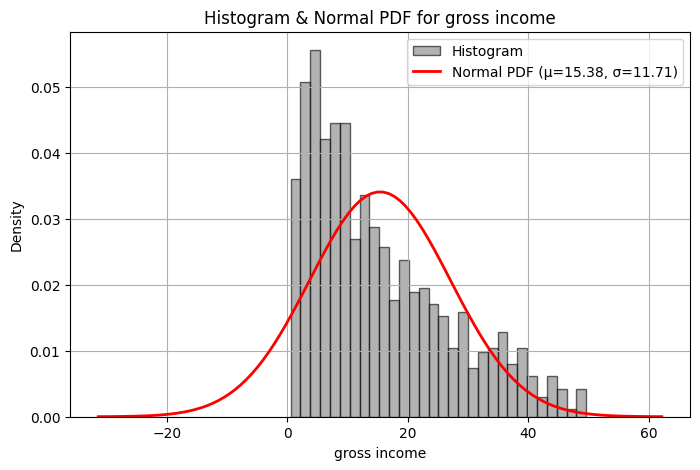

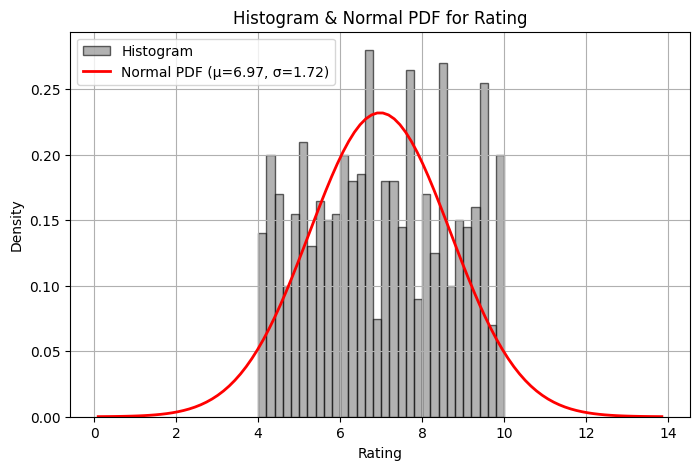

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import norm

for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))

    mean = data[col].mean()
    std = data[col].std()

    x = np.linspace(mean - 4*std, mean + 4*std, 100)
    pdf = norm.pdf(x, mean, std)

    plt.hist(data[col], bins=30, density=True, alpha=0.6, color='gray', edgecolor='black', label='Histogram')
    plt.plot(x, pdf, color='red', linewidth=2, label=f'Normal PDF (μ={mean:.2f}, σ={std:.2f})')

    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Histogram & Normal PDF for {col}')
    plt.legend()
    plt.grid()

    plt.show()


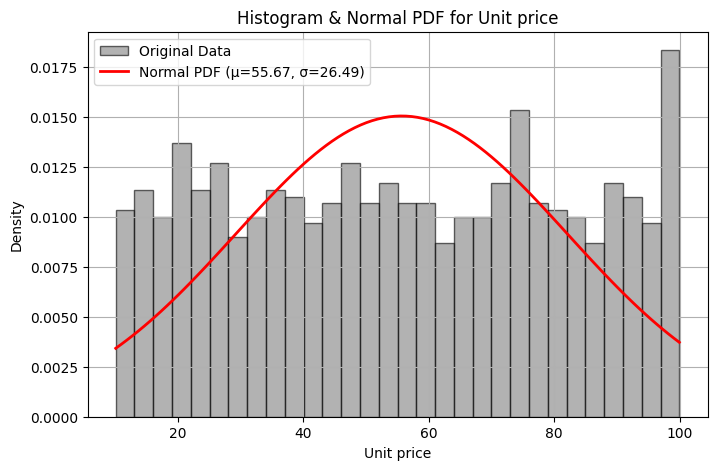

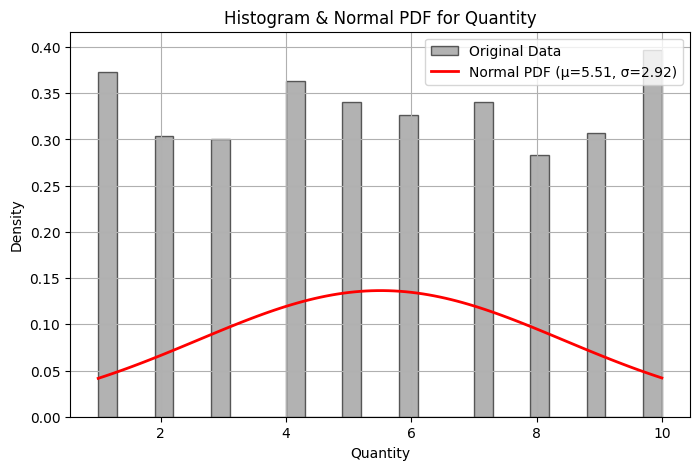

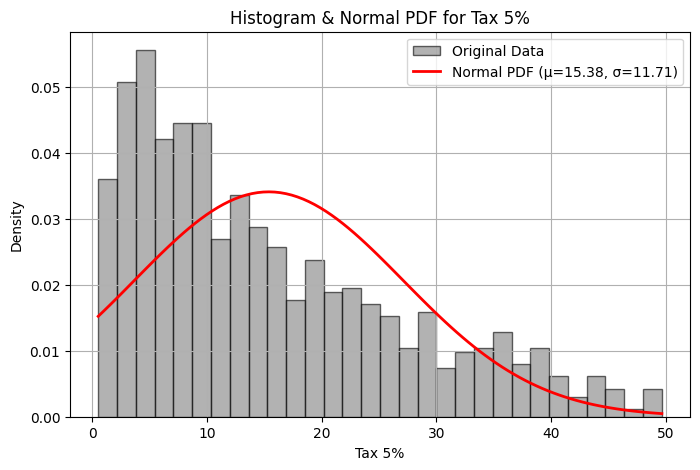

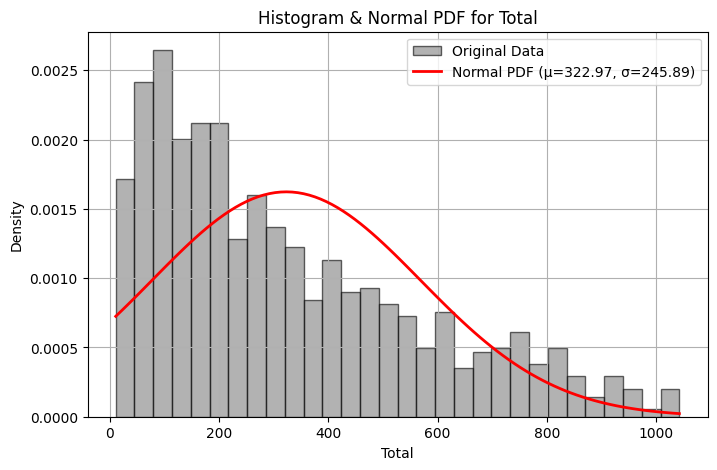

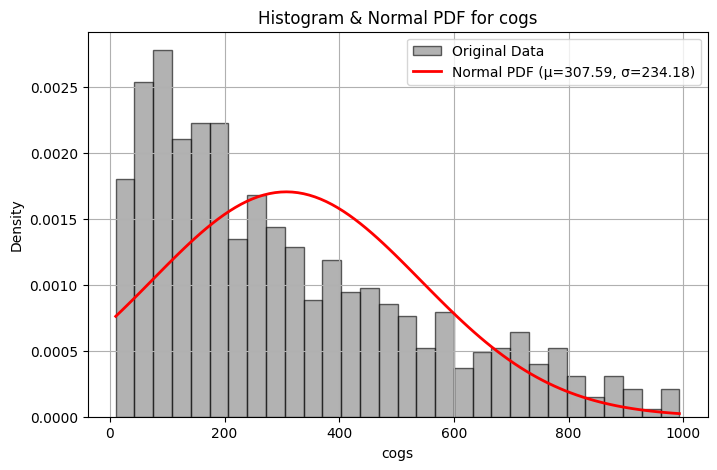

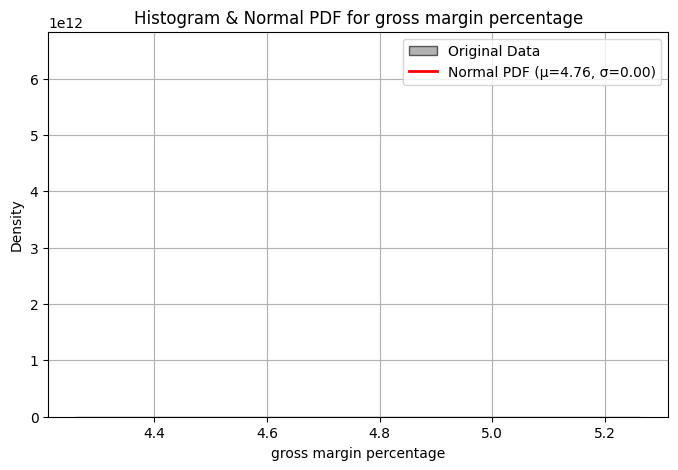

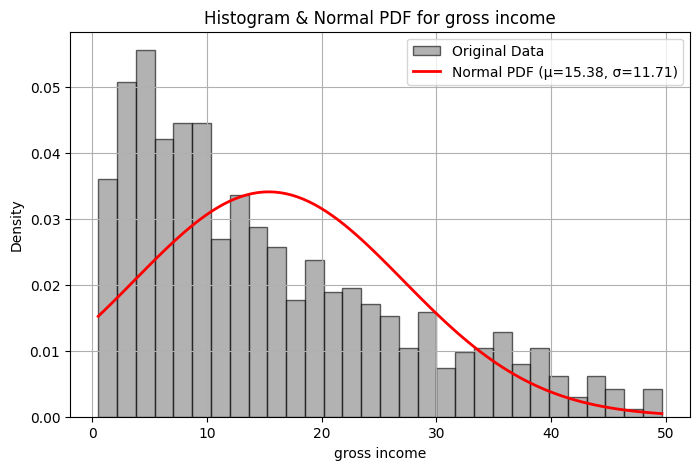

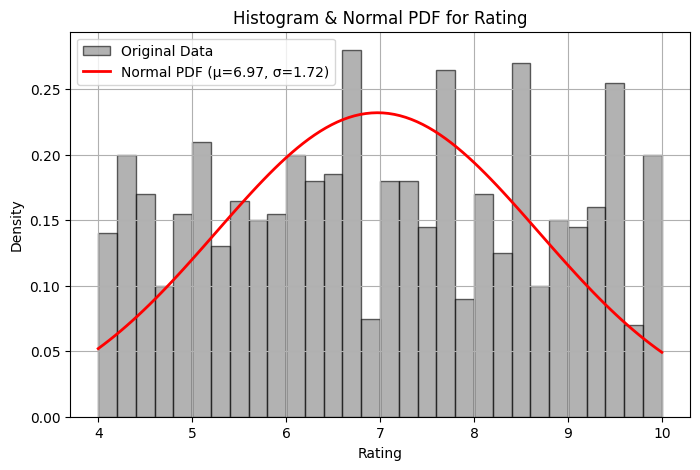

In [30]:
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))

    mean = data[col].mean()
    std = data[col].std()

    x = np.linspace(min(data[col]), max(data[col]), 100)
    pdf = norm.pdf(x, mean, std)

    plt.hist(data[col], bins=30, density=True, alpha=0.6, color='gray', edgecolor='black', label='Original Data')
    plt.plot(x, pdf, color='red', linewidth=2, label=f'Normal PDF (μ={mean:.2f}, σ={std:.2f})')

    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Histogram & Normal PDF for {col}')
    plt.legend()
    plt.grid()

    plt.show()


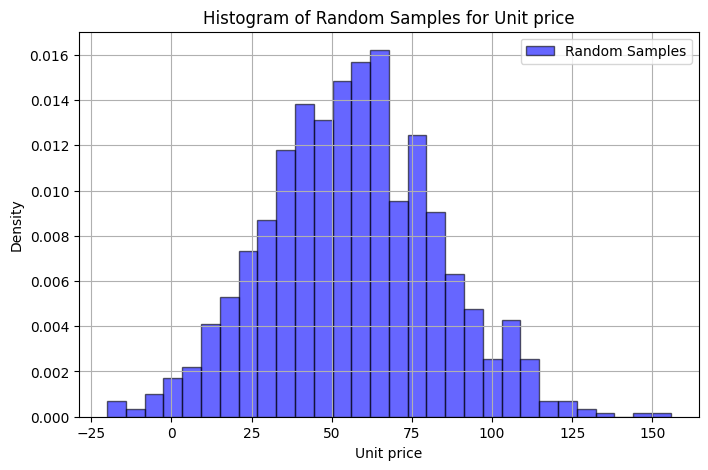

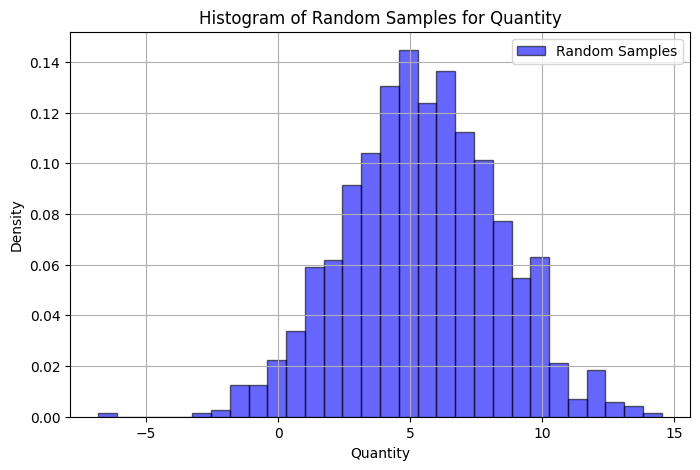

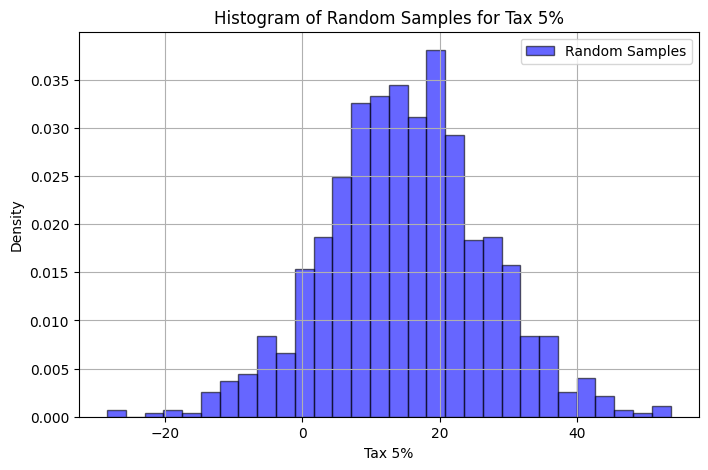

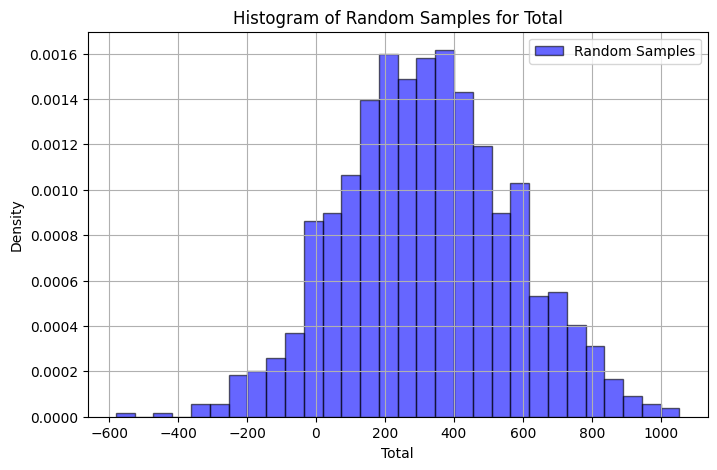

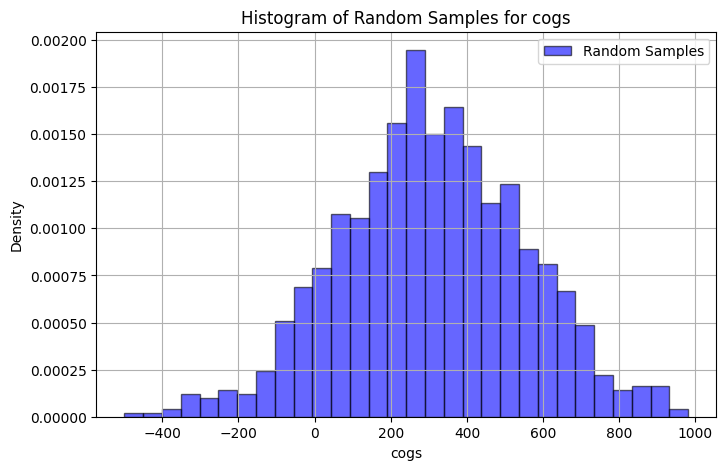

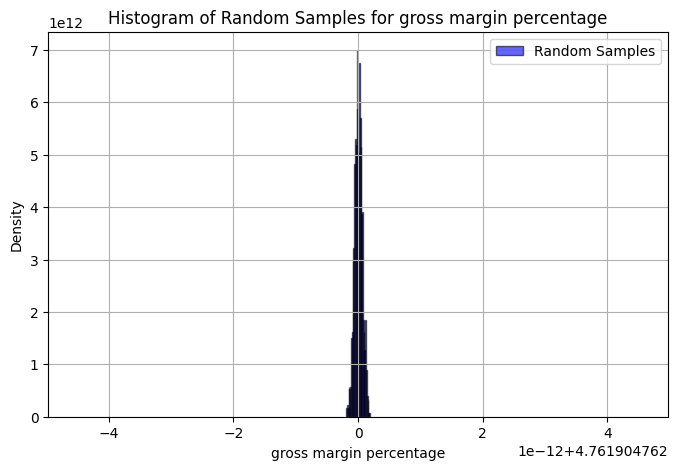

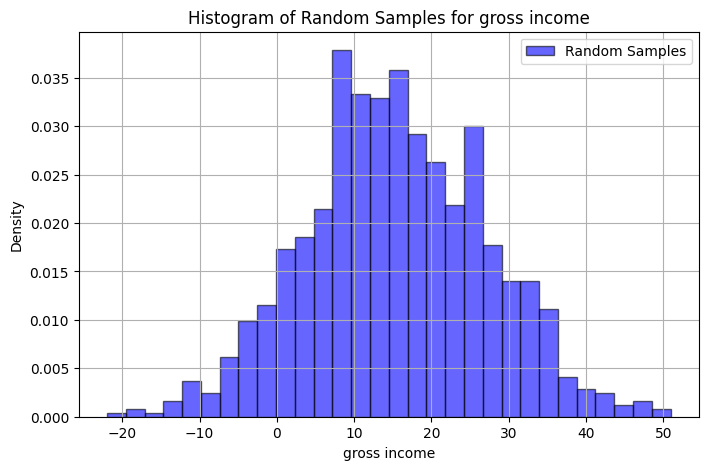

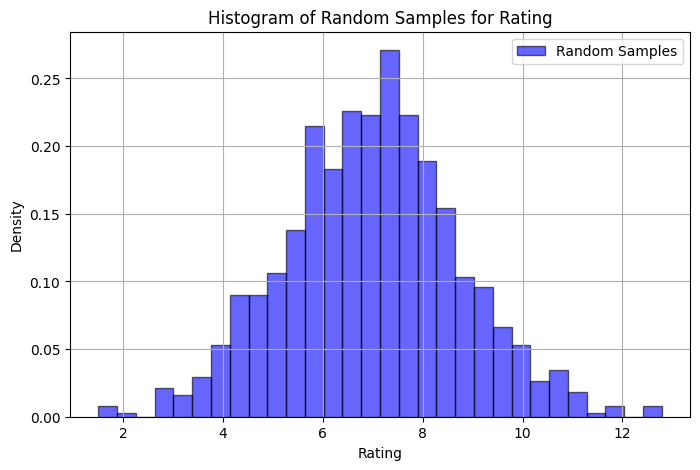

In [31]:
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))

    mean = data[col].mean()
    std = data[col].std()

    random_samples = np.random.normal(mean, std, 1000)

    plt.hist(random_samples, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label='Random Samples')

    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Histogram of Random Samples for {col}')
    plt.legend()
    plt.grid()

    plt.show()


In [32]:
for col in data.select_dtypes(include=[np.number]).columns:
    mean = data[col].mean()
    std = data[col].std()

    probability = norm.cdf(mean, mean, std)

    print(f'P(X < mean) for {col}: {probability:.4f}')


P(X < mean) for Unit price: 0.5000
P(X < mean) for Quantity: 0.5000
P(X < mean) for Tax 5%: 0.5000
P(X < mean) for Total: 0.5000
P(X < mean) for cogs: 0.5000
P(X < mean) for gross margin percentage: 0.5000
P(X < mean) for gross income: 0.5000
P(X < mean) for Rating: 0.5000


In [33]:
quantile = 0.95  # 95th percentile

for col in data.select_dtypes(include=[np.number]).columns:
    mean = data[col].mean()
    std = data[col].std()

    percentile_value = norm.ppf(quantile, mean, std)

    print(f'95th percentile for {col}: {percentile_value:.4f}')

95th percentile for Unit price: 99.2519
95th percentile for Quantity: 10.3186
95th percentile for Tax 5%: 34.6387
95th percentile for Total: 727.4121
95th percentile for cogs: 692.7735
95th percentile for gross margin percentage: 4.7619
95th percentile for gross income: 34.6387
95th percentile for Rating: 9.7995


In [34]:
for col in data.select_dtypes(include=[np.number]).columns:
    mean = data[col].mean()
    std = data[col].std()

    density = norm.pdf(mean, mean, std)

    print(f'PDF at mean for {col}: {density:.4f}')

PDF at mean for Unit price: 0.0151
PDF at mean for Quantity: 0.1365
PDF at mean for Tax 5%: 0.0341
PDF at mean for Total: 0.0016
PDF at mean for cogs: 0.0017
PDF at mean for gross margin percentage: 6506441096045.8281
PDF at mean for gross income: 0.0341
PDF at mean for Rating: 0.2321


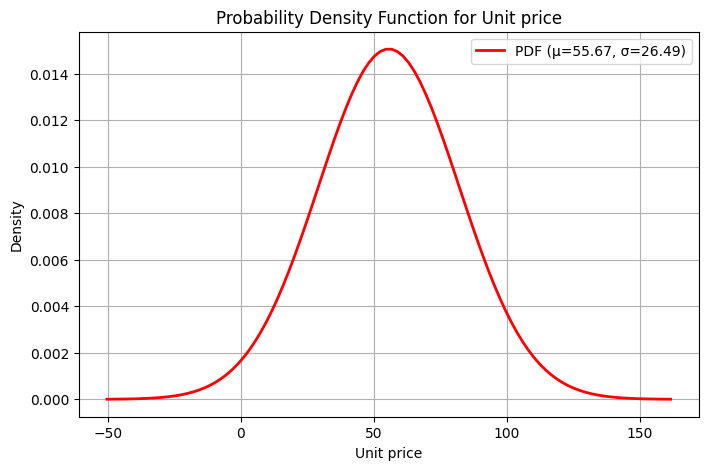

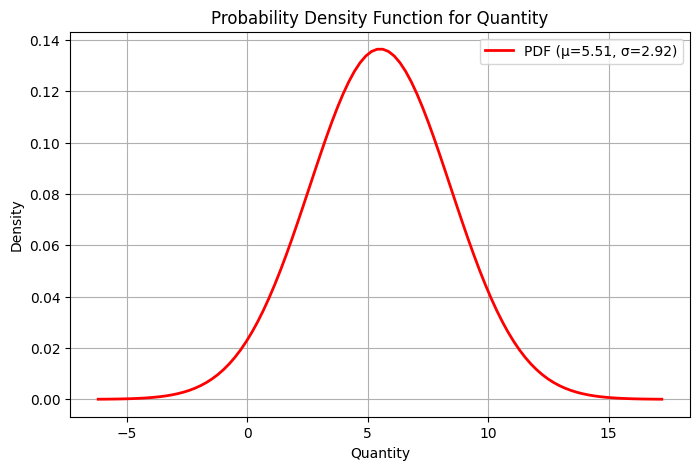

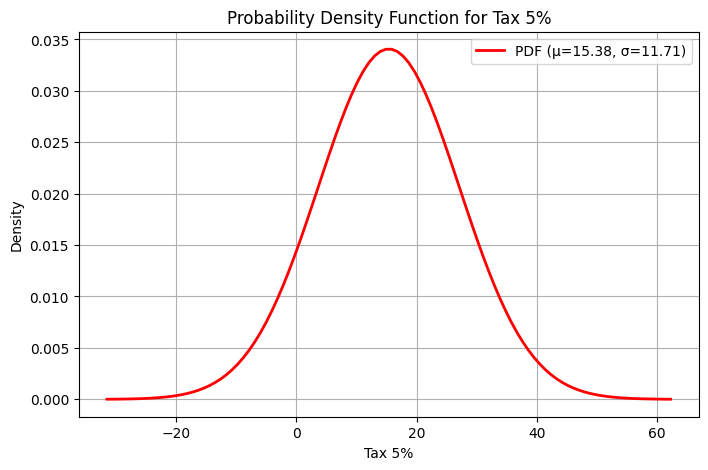

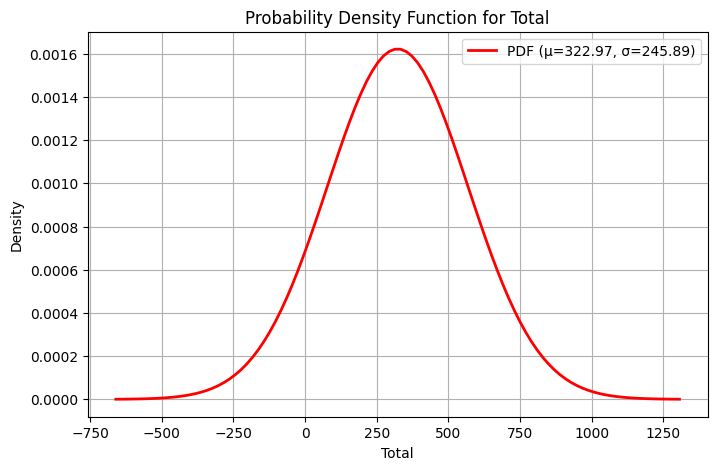

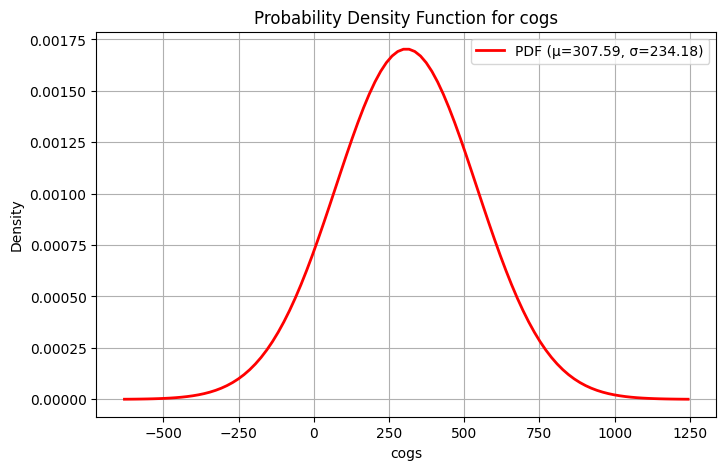

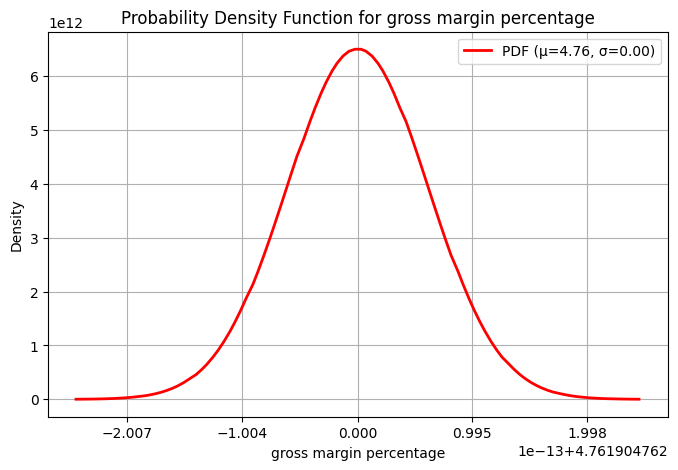

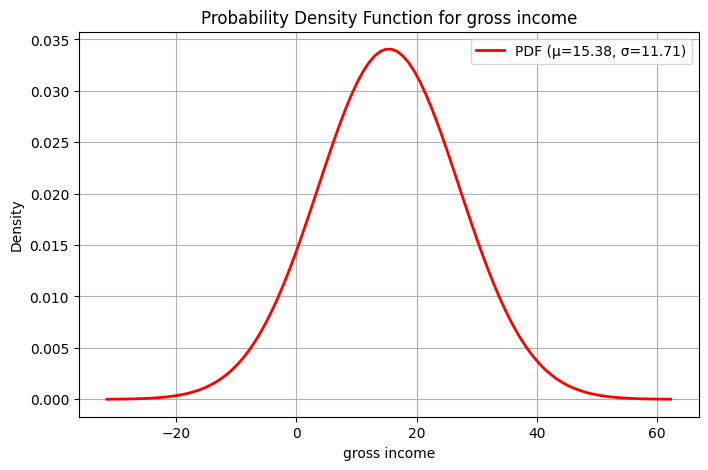

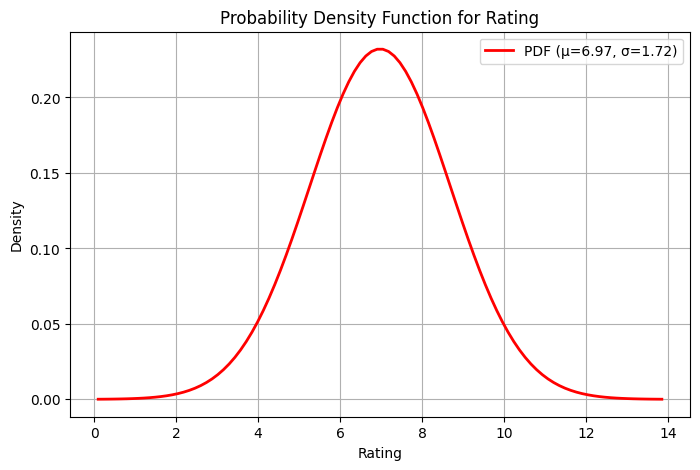

In [35]:
for col in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))

    mean = data[col].mean()
    std = data[col].std()

    x = np.linspace(mean - 4*std, mean + 4*std, 100)
    pdf = norm.pdf(x, mean, std)

    plt.plot(x, pdf, color='red', linewidth=2, label=f'PDF (μ={mean:.2f}, σ={std:.2f})')

    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Probability Density Function for {col}')
    plt.legend()
    plt.grid()

    plt.show()

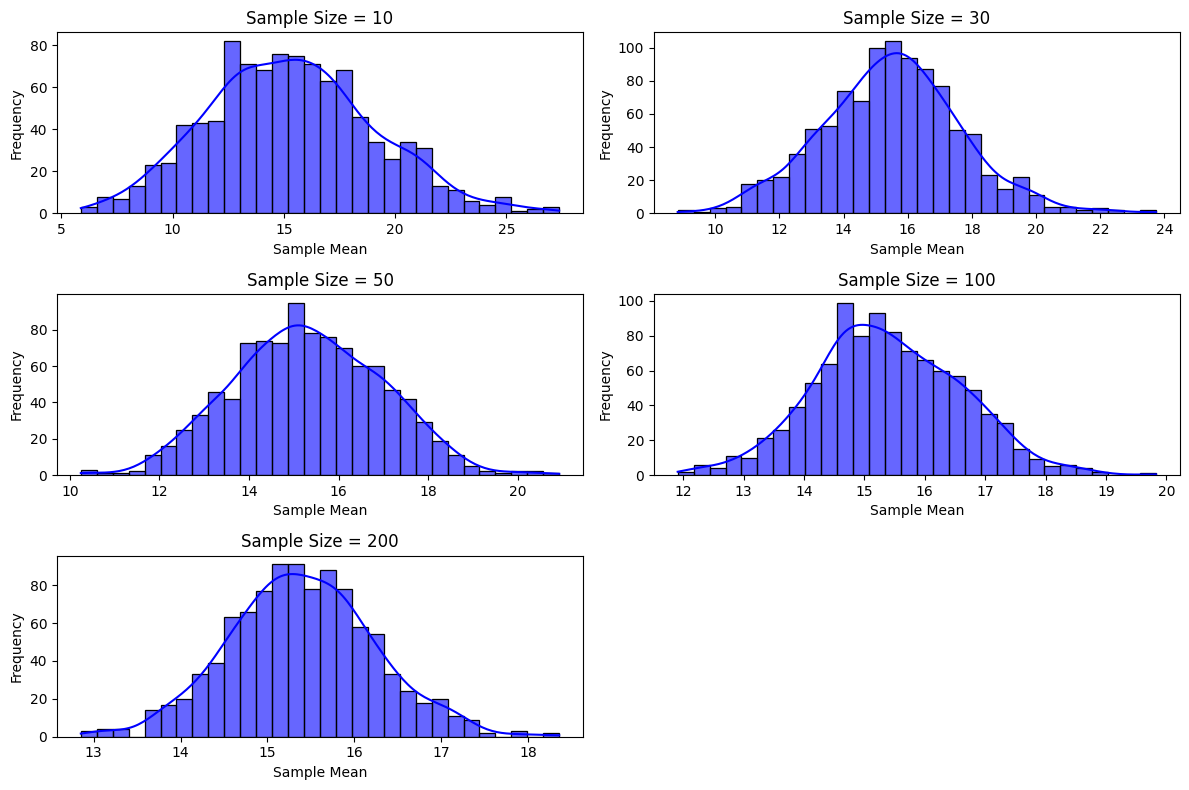

In [37]:
import seaborn as sns
skewed_col = data.select_dtypes(include=[np.number]).skew().abs().idxmax()

# Define sample sizes
sample_sizes = [10, 30, 50, 100, 200]
num_samples = 1000

plt.figure(figsize=(12, 8))

for i, size in enumerate(sample_sizes, 1):
    sample_means = [np.mean(np.random.choice(data[skewed_col], size, replace=True)) for _ in range(num_samples)]

    plt.subplot(3, 2, i)
    sns.histplot(sample_means, bins=30, kde=True, color='blue', alpha=0.6)
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.title(f'Sample Size = {size}')

plt.tight_layout()
plt.show()

In [38]:
from scipy.stats import skew, kurtosis, norm

# Identify the most skewed numeric column
skewed_col = data.select_dtypes(include=[np.number]).skew().abs().idxmax()

# Compute skewness and kurtosis for original data
original_skewness = skew(data[skewed_col])
original_kurtosis = kurtosis(data[skewed_col])

print(f'Original Data - Skewness: {original_skewness:.4f}, Kurtosis: {original_kurtosis:.4f}')

# Define sample sizes
sample_sizes = [10, 30, 50, 100, 200]
num_samples = 1000

skewness_values = []
kurtosis_values = []

for size in sample_sizes:
    sample_means = [np.mean(np.random.choice(data[skewed_col], size, replace=True)) for _ in range(num_samples)]

    # Compute skewness and kurtosis for sample means
    sample_skew = skew(sample_means)
    sample_kurt = kurtosis(sample_means)

    skewness_values.append(sample_skew)
    kurtosis_values.append(sample_kurt)

    print(f'Sample Size {size} - Skewness: {sample_skew:.4f}, Kurtosis: {sample_kurt:.4f}')


Original Data - Skewness: 0.8912, Kurtosis: -0.0875
Sample Size 10 - Skewness: 0.3688, Kurtosis: 0.2078
Sample Size 30 - Skewness: 0.1655, Kurtosis: -0.1275
Sample Size 50 - Skewness: 0.1063, Kurtosis: 0.0630
Sample Size 100 - Skewness: 0.1804, Kurtosis: 0.6789
Sample Size 200 - Skewness: 0.0487, Kurtosis: 0.0049


In [39]:
# Compute the 99th percentile value using the normal distribution
p99_value = norm.ppf(0.99, data[skewed_col].mean(), data[skewed_col].std())

print(f'99th Percentile Value for {skewed_col}: {p99_value:.4f}')

99th Percentile Value for Tax 5%: 42.6182
